In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import mplfinance as mpf
import yfinance as yf
yf.pdr_override()
%matplotlib inline 

In [2]:
df = yf.download(tickers = "JPY=X",start = "2022-06-01", end ="2022-07-01" ,interval = "15m")
print(df)

[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Datetime                                                                    
2022-05-31 20:30:00+01:00  128.703995  128.707993  128.630005  128.673004   
2022-05-31 20:45:00+01:00  128.673996  128.776993  128.649994  128.714996   
2022-05-31 21:00:00+01:00  128.720993  128.740997  128.630005  128.718002   
2022-05-31 21:15:00+01:00  128.720993  128.744995  128.660004  128.710007   
2022-05-31 21:30:00+01:00  128.710999  128.744003  128.669998  128.720993   
...                               ...         ...         ...         ...   
2022-06-30 19:15:00+01:00  135.647003  135.677994  135.600006  135.647003   
2022-06-30 19:30:00+01:00  135.649994  135.669998  135.589996  135.639008   
2022-06-30 19:45:00+01:00  135.630005  135.641998  135.529999  135.563004   
2022-06-30 20:00:00+01:00  135.561996  135.597000  135.520004  135.587997   
2022-06

In [3]:
# Function to calculate average true range
def ATR(DF, n):
  df = DF.copy() # making copy of the original dataframe
  df['H-L'] = abs(df['High'] - df['Low']) 
  df['H-PC'] = abs(df['High'] - df['Adj Close'].shift(1))# high -previous close
  df['L-PC'] = abs(df['Low'] - df['Adj Close'].shift(1)) #low - previous close
  df['TR'] = df[['H-L','H-PC','L-PC']].max(axis =1, skipna = False) # True range
  df['ATR'] = df['TR'].rolling(n).mean() # average –true range
  df = df.drop(['H-L','H-PC','L-PC'], axis =1) # dropping the unneccesary columns
  df.dropna(inplace = True) # droping null items
  return df

In [4]:
print(ATR(df, 14))

                                 Open        High         Low       Close  \
Datetime                                                                    
2022-06-01 00:00:00+01:00  128.759995  128.761993  128.679993  128.731003   
2022-06-01 00:15:00+01:00  128.735001  128.761993  128.669998  128.707993   
2022-06-01 00:30:00+01:00  128.710007  128.725998  128.600006  128.714005   
2022-06-01 00:45:00+01:00  128.718002  128.738998  128.649994  128.733002   
2022-06-01 01:00:00+01:00  128.738007  128.925003  128.699997  128.869995   
...                               ...         ...         ...         ...   
2022-06-30 19:15:00+01:00  135.647003  135.677994  135.600006  135.647003   
2022-06-30 19:30:00+01:00  135.649994  135.669998  135.589996  135.639008   
2022-06-30 19:45:00+01:00  135.630005  135.641998  135.529999  135.563004   
2022-06-30 20:00:00+01:00  135.561996  135.597000  135.520004  135.587997   
2022-06-30 20:15:00+01:00  135.580994  135.679001  135.559998  135.660995   

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\mplfinance\plotting.py:648: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


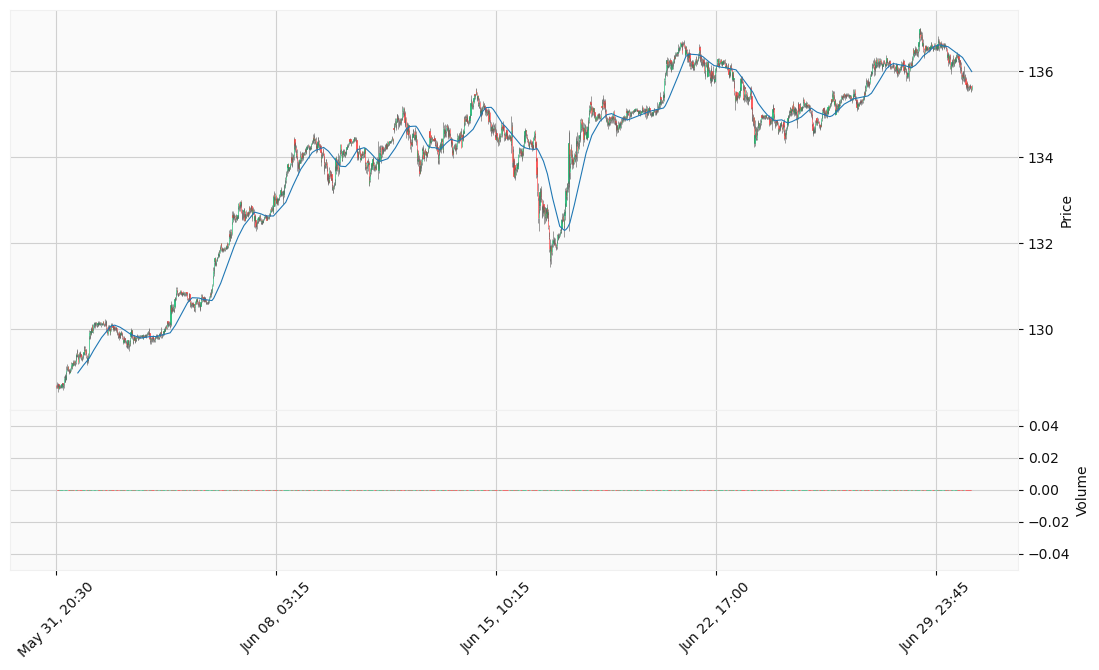

In [5]:
mpf.plot(df,type="candle", volume = True, style = 'yahoo',mav=50, figsize=(14,8))

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\mplfinance\plotting.py:648: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


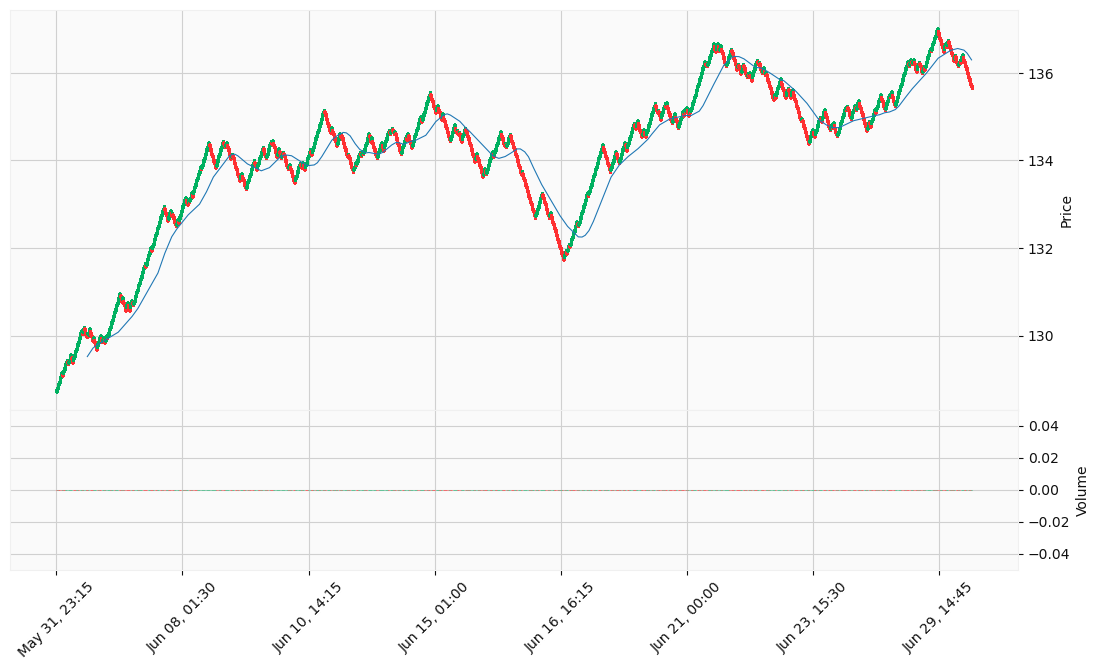

In [6]:
mpf.plot(df,type="renko", volume = True, style = 'yahoo', renko_params = dict(brick_size = 0.05),mav=50,
         figsize=(14,8))

## Log Renko

In [7]:
df['Open'] = np.log(df['Open'])
df['High'] = np.log(df['High'])
df['Low'] = np.log(df['Low'])
df['Close'] = np.log(df['Close'])
print ('Mean is ',np.mean(df['Close']) )
print ('Standard Deviation is ',np.std(df['Close']))
#print(df)

Mean is  4.897081759990833
Standard Deviation is  0.0158093322690964


C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\mplfinance\plotting.py:648: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


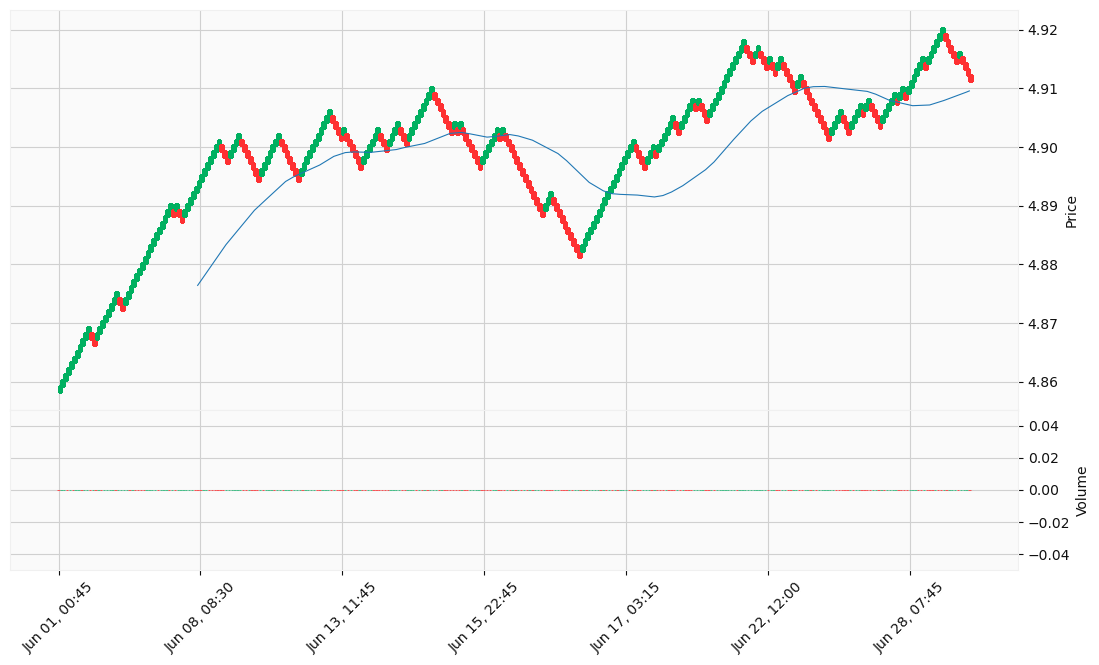

In [8]:
mpf.plot(df,type="renko", volume = True, style = 'yahoo' , renko_params = dict(brick_size = 0.001),mav=50,
         figsize=(14,8))